In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
from neko._methods.methods_update import Connections
import omnipath as op
import pandas as pd

CPU times: user 4.16 s, sys: 1.5 s, total: 5.66 s
Wall time: 4.59 s


In [2]:
interactions = op.interactions.OmniPath.get()

In [3]:
initial_nodes = [
"PIK3CA",
"MAP2K1",
"GSK3B",
"MAPK14",
"CTNNB1",
"AKT1",
"MAP3K7"]

In [4]:
initial_nodes_2 = ["PDIA3","CALR","BAX","BAD","BCAP31","CANX","EIF2AK3","ATF6","IRE1"]

In [5]:
new_net = Network(initial_nodes=initial_nodes_2, resources=interactions)

In [6]:
new_net2 = Network(initial_nodes=initial_nodes_2, resources=interactions)

In [7]:
new_net3 = Network(initial_nodes=initial_nodes_2, resources=interactions)

In [8]:
new_net4 = Network(initial_nodes=initial_nodes_2, resources=interactions)

In [9]:
new_net5 = Network(initial_nodes=initial_nodes_2, resources=interactions)

In [10]:
new_net6 = Network(initial_nodes=initial_nodes_2, resources=interactions)

# Original complete connection

In [11]:
%%time
new_net.complete_connection(maxlen=6, k_mean="extensive", consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 1min 4s, sys: 11.9 ms, total: 1min 4s
Wall time: 1min 4s


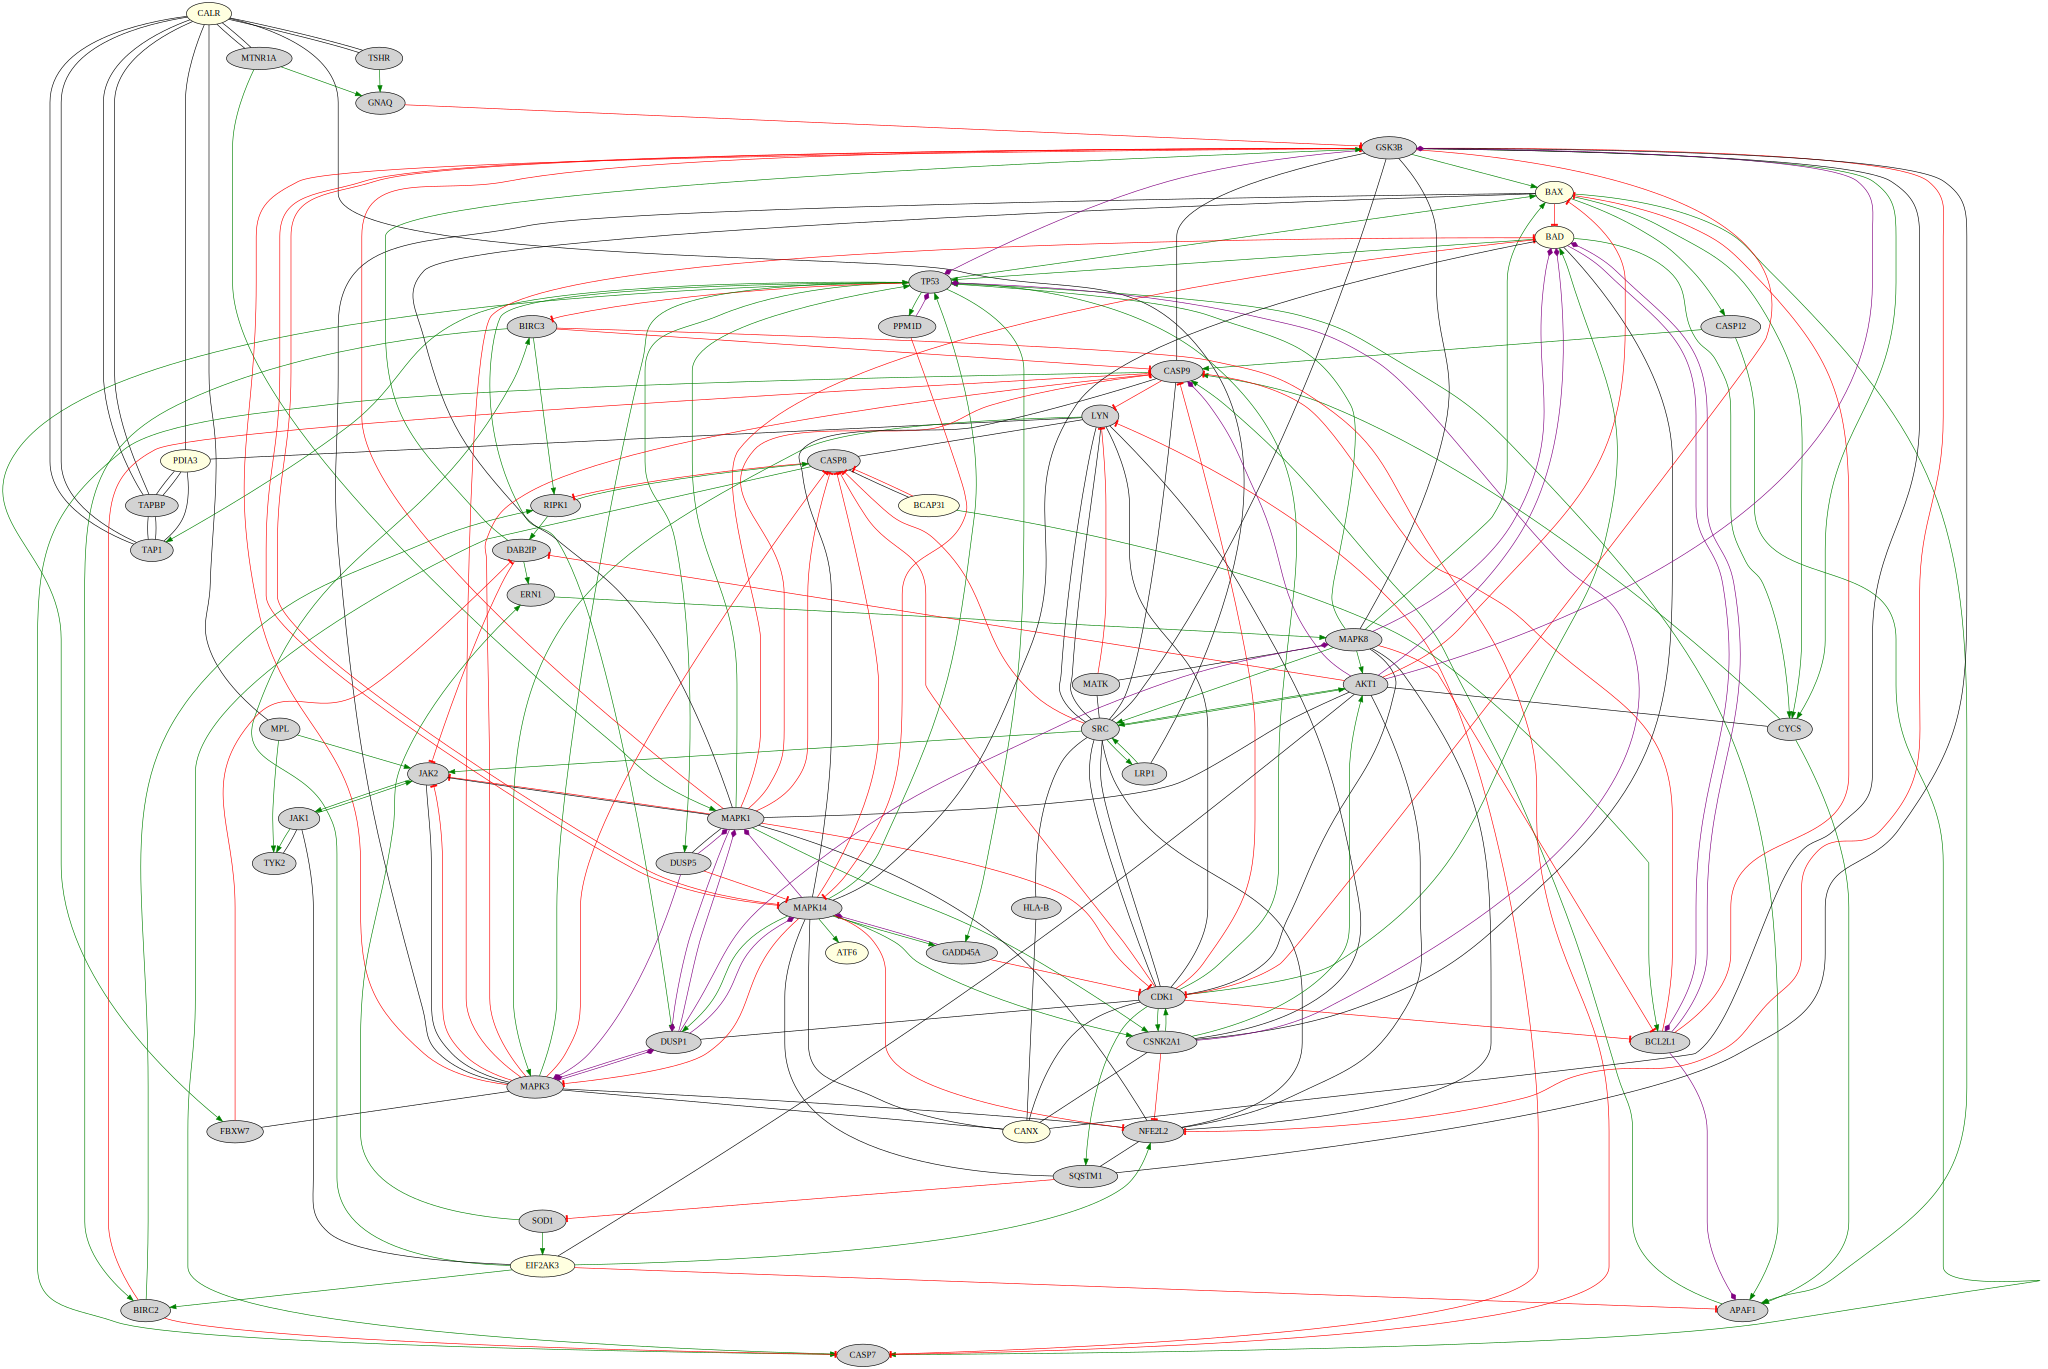

In [12]:
visualizer = NetworkVisualizer(new_net, color_by='effect', noi=True)
visualizer.render(output_file="Net1")

# V2 complete connection: shortest_path & all_shortes_paths

In [13]:
%%time
new_net2.complete_connectionv2(maxlen=6, consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 1min 46s, sys: 3.81 ms, total: 1min 46s
Wall time: 1min 46s


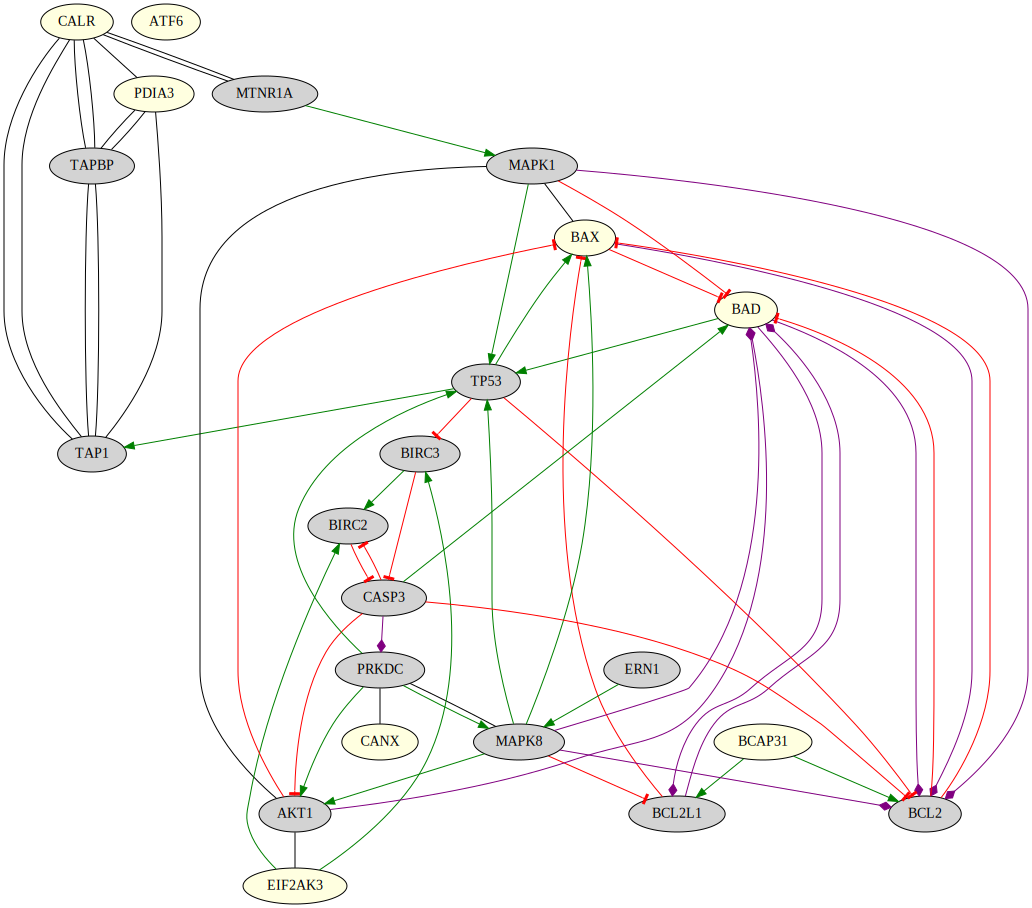

In [14]:
visualizer2 = NetworkVisualizer(new_net2, color_by='effect', noi=True)
visualizer2.render(output_file="Net2")

# V3 complete connection: bfs & find_paths

In [15]:
%%time
new_net3.complete_connectionv3(maxlen=4, consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 51.8 s, sys: 2.95 ms, total: 51.8 s
Wall time: 51.8 s


In [16]:
visualizer3 = NetworkVisualizer(new_net3, color_by='effect', noi=True)
visualizer3.render(output_file="Net3")

# V5 complete connection: shortest_path & find_paths

In [17]:
%%time
new_net5.complete_connectionv5(maxlen=4, consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 3min 45s, sys: 46.9 ms, total: 3min 45s
Wall time: 3min 45s


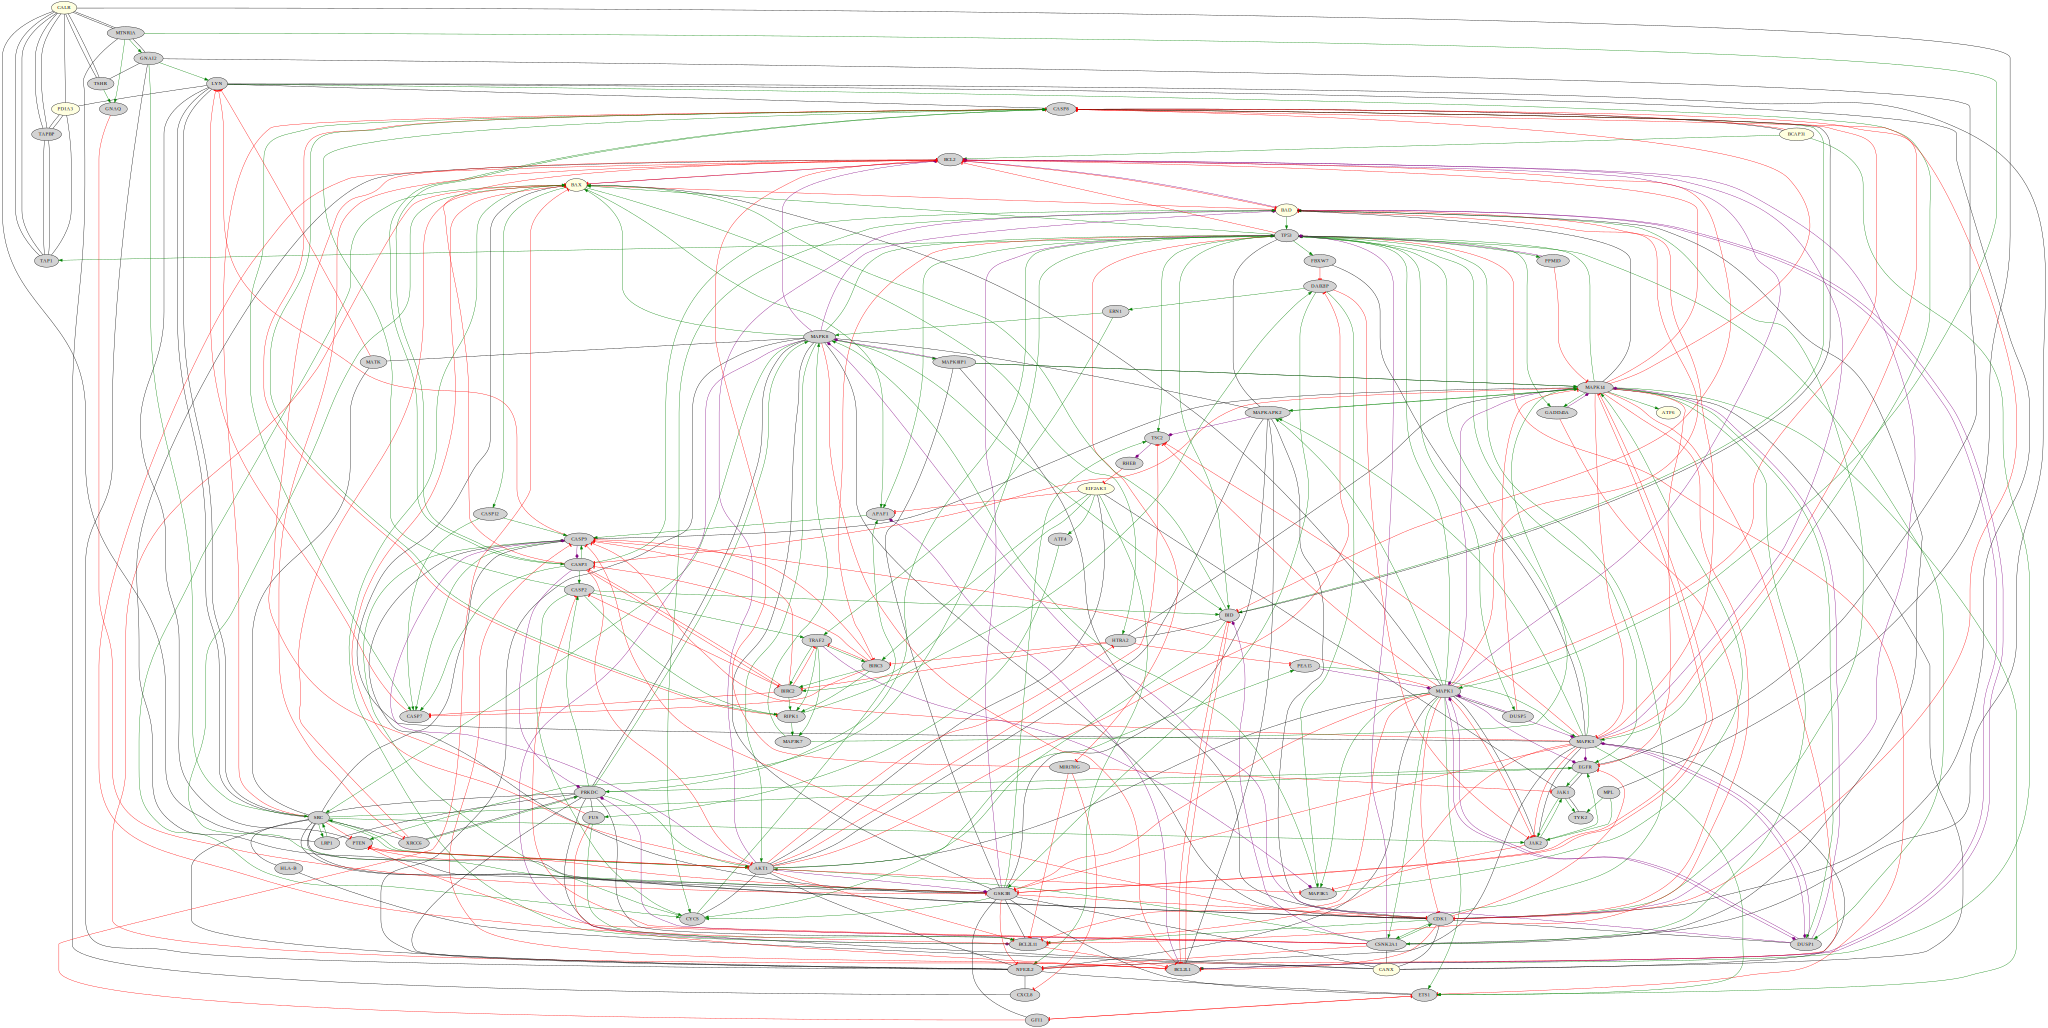

In [18]:
visualizer5 = NetworkVisualizer(new_net5, color_by='effect', noi=True)
visualizer5.render(output_file="Net5")

# V4 complete connection: bfs & all_shortes_paths

In [19]:
%%time
new_net4.complete_connectionv4(maxlen=4, consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 5min 34s, sys: 38 ms, total: 5min 34s
Wall time: 5min 34s


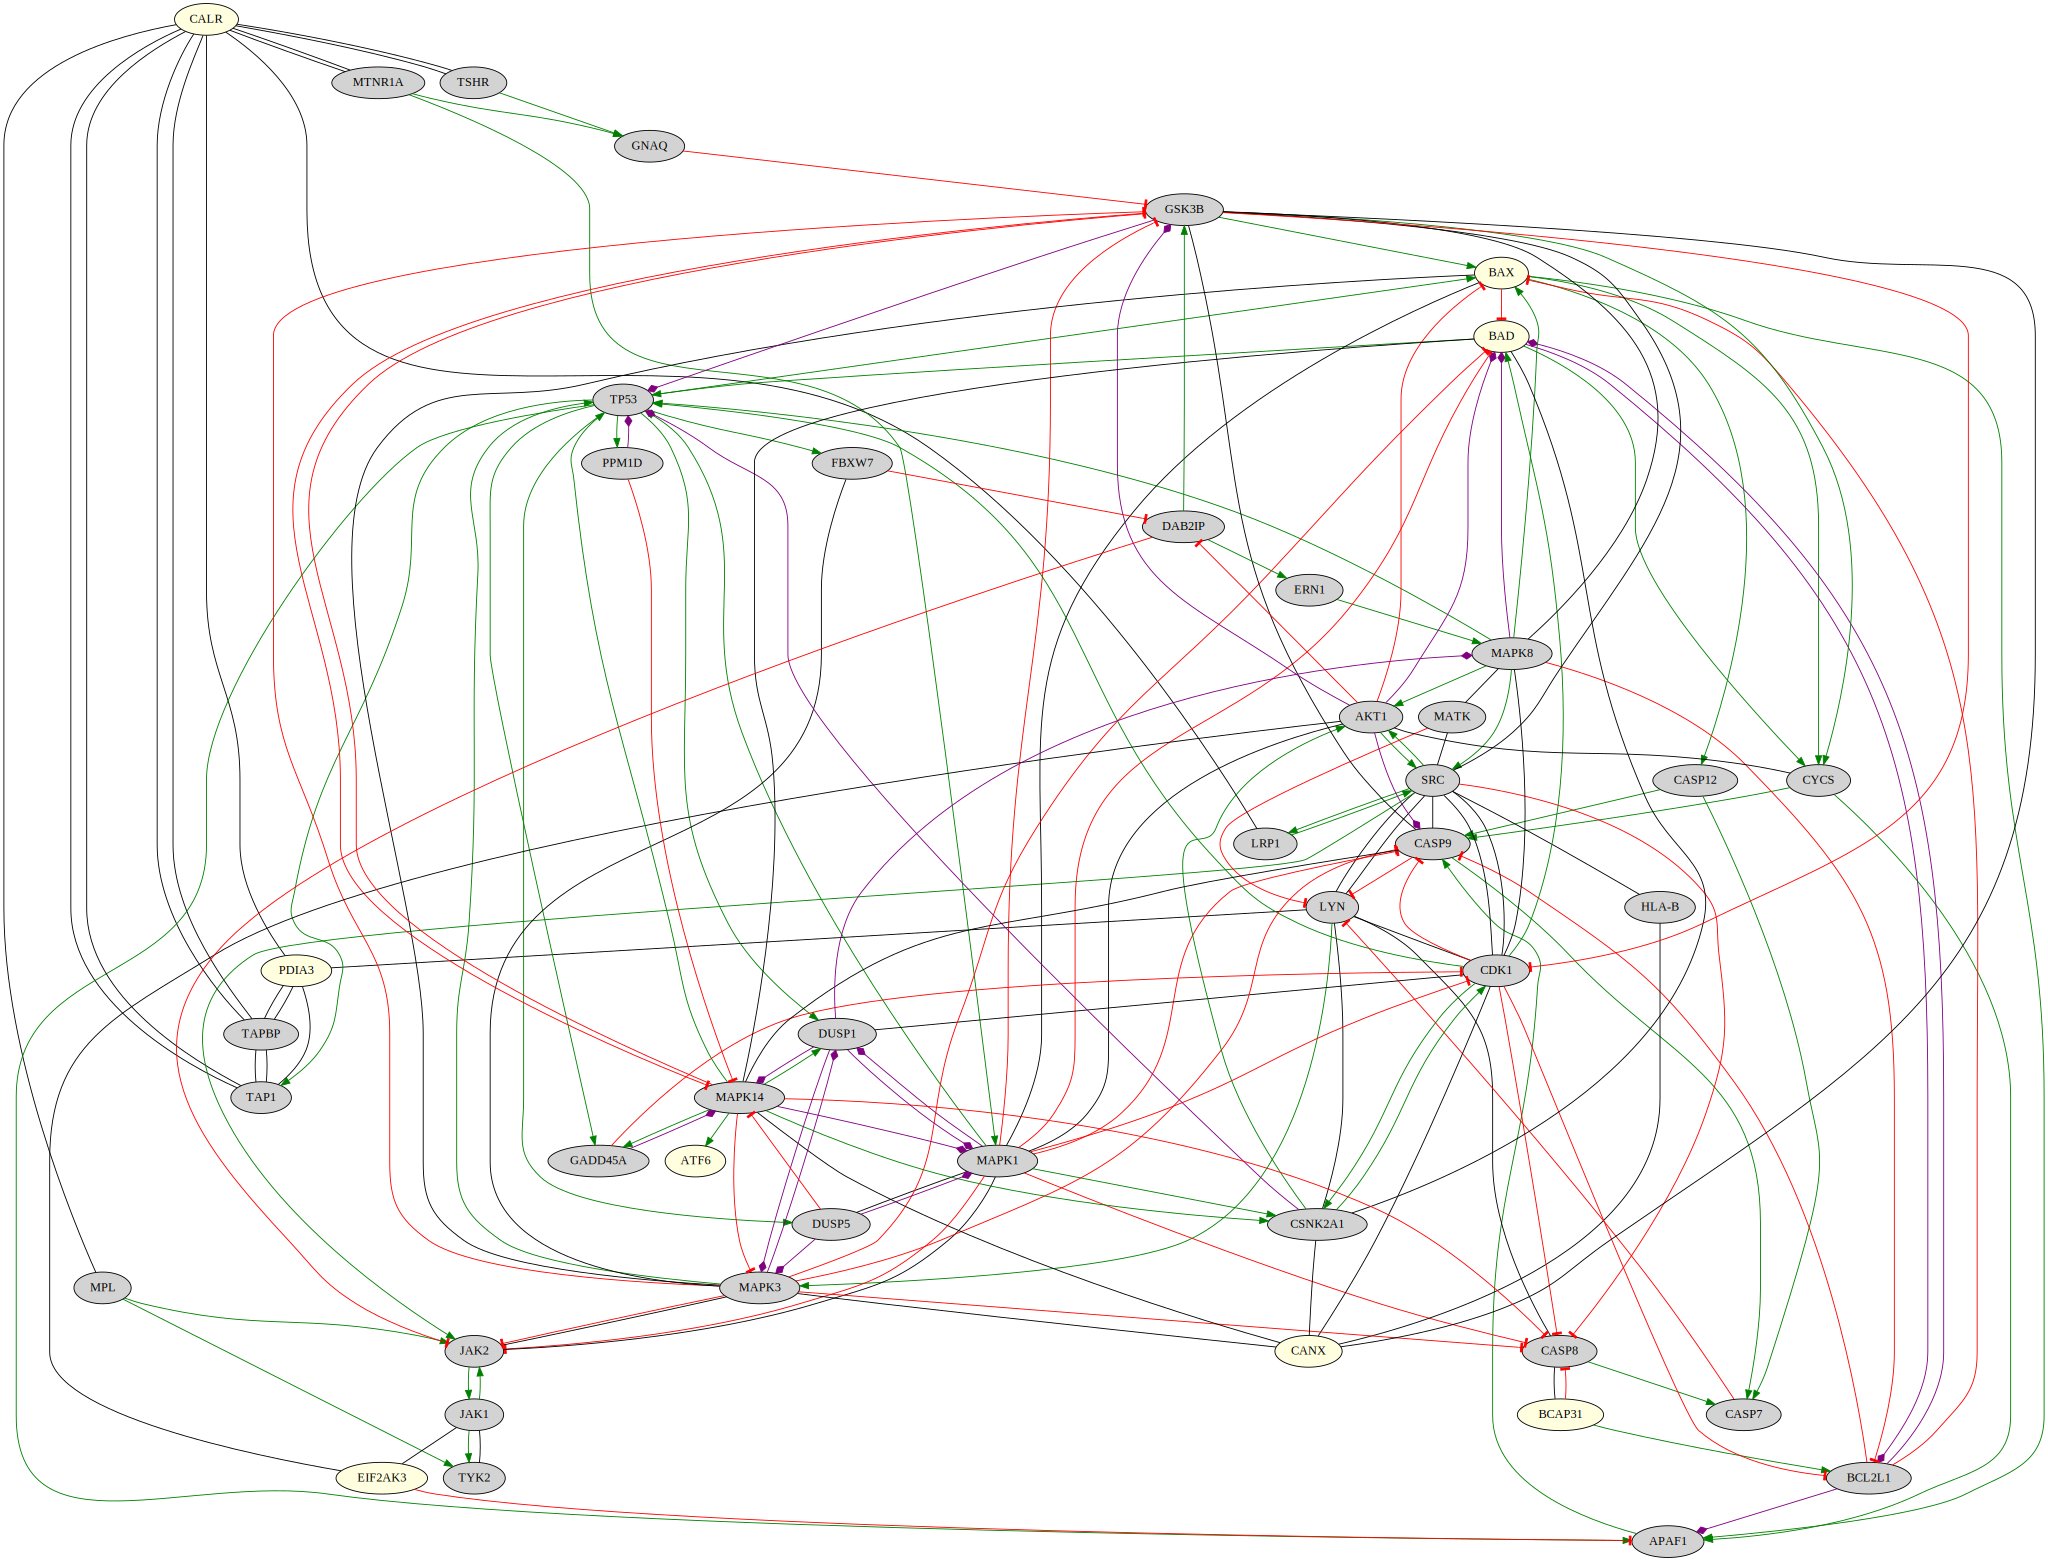

In [20]:
visualizer4 = NetworkVisualizer(new_net4, color_by='effect', noi=True)
visualizer4.render(output_file="Net4")

# V6 complete connection: bfs & bfs

In [21]:
%%time
new_net6.complete_connectionv6(consensus=False, only_signed=False, connect_node_when_first_introduced=True)

CPU times: user 29.8 s, sys: 997 µs, total: 29.8 s
Wall time: 29.8 s


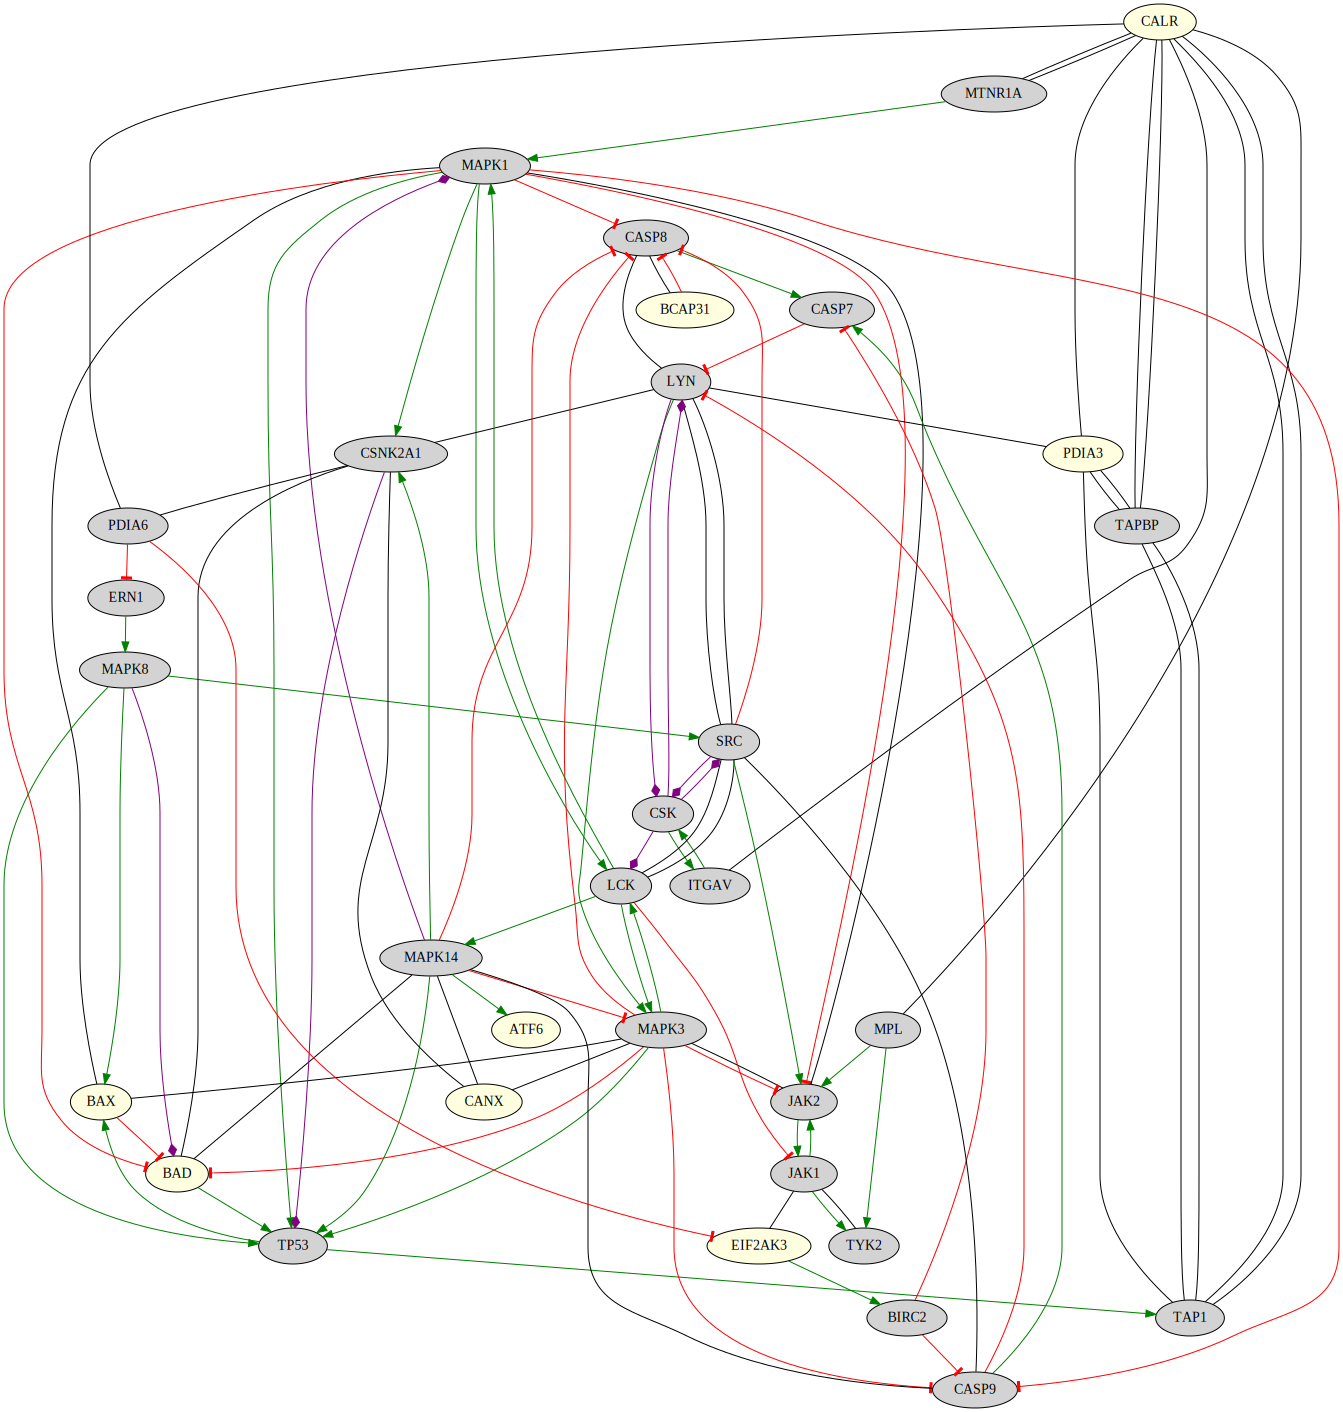

In [22]:
visualizer6 = NetworkVisualizer(new_net6, color_by='effect', noi=True)
visualizer6.render(output_file="Net6")

In [26]:
%%time
new_net.connect.find_shortest_path("Q02750", "O43318", max_len=4)

CPU times: user 122 ms, sys: 1 ms, total: 123 ms
Wall time: 122 ms


['Q02750', 'P49841', 'Q9Y4K3', 'O43318']

In [27]:
%%time
new_net.connect.find_all_shortest_paths("Q02750", "O43318", max_len=4)

CPU times: user 105 ms, sys: 998 µs, total: 106 ms
Wall time: 106 ms


[['Q02750', 'P49841', 'Q9Y4K3', 'O43318'],
 ['Q02750', 'P49841', 'O95819', 'O43318'],
 ['Q02750', 'P49841', 'Q13555', 'O43318'],
 ['Q02750', 'P28482', 'P67775', 'O43318'],
 ['Q02750', 'P28482', 'P49116', 'O43318']]

In [28]:
%%time
new_net.connect.bfs("P51572", "P30101")

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 3.01 ms


[('P51572', 'Q07817'),
 ('Q07817', 'P55211'),
 ('P55211', 'P07948'),
 ('P07948', 'P30101')]

In [29]:
%%time
found = False
i=0
while not found:
    a = new_net.connect.find_paths("Q02750", "O43318", maxlen=i)
    if a:
        found=True
    else:
        i = i+1

CPU times: user 7.52 ms, sys: 0 ns, total: 7.52 ms
Wall time: 7.5 ms


In [30]:
a

[['Q02750', 'P49841', 'Q9Y4K3', 'O43318'],
 ['Q02750', 'P49841', 'O95819', 'O43318'],
 ['Q02750', 'P49841', 'Q13555', 'O43318'],
 ['Q02750', 'P28482', 'P67775', 'O43318'],
 ['Q02750', 'P28482', 'P49116', 'O43318']]